# Natural Computing Assignment 5

In [1]:
!pip install logomaker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 25.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import string
import seaborn as sns
import logomaker

In [3]:
rng = np.random.default_rng(seed=42)

### Exercise 5.2

In [ ]:
def generate_bitseq(length, rng):
  """
  Generates a random binary sequence of specified length.

  Parameters:
  length (int): Length of the binary sequence to be generated.
  rng (numpy.random.Generator): Random number generator.

  Returns:
  numpy.ndarray: Randomly generated binary sequence.
  """
  return rng.integers(low=0, high=2, size=length)

def mutate_bitseq(bitseq, mu, rng):
  """
    Mutates a binary sequence based on a given mutation rate.

    Parameters:
    bitseq (numpy.ndarray): Binary sequence to be mutated.
    mu (float): Mutation rate, indicating the probability of mutation for each bit.
    rng (numpy.random.Generator): Random number generator.

    Returns:
    numpy.ndarray: Mutated binary sequence.
  """
  mutated_bitseq = bitseq.copy()
  for i in range(len(bitseq)):
    prob = rng.random()
    if prob < mu:
      mutated_bitseq[i] = (bitseq[i] + 1) % 2
  return mutated_bitseq

def fitness_bitseq(bitseq, goal_bitseq):
  """
  Computes the fitness of a binary sequence by comparing it with a goal binary sequence.

  Parameters:
  bitseq (numpy.ndarray): Binary sequence to be evaluated.
  goal_bitseq (numpy.ndarray): Target binary sequence.

  Returns:
  float: Fitness value, normalized to the length of the goal binary sequence.
  """
  return len(np.where(bitseq-goal_bitseq == 0)[0]) / len(goal_bitseq) # I didnt do CGA (lecture slides 5)

def update_parent(bitseq, mutated_bitseq, goal_bitseq):
  """
    Updates the parent binary sequence based on the fitness of mutated sequence.

    Parameters:
    bitseq (numpy.ndarray): Parent binary sequence.
    mutated_bitseq (numpy.ndarray): Mutated binary sequence.
    goal_bitseq (numpy.ndarray): Target binary sequence.

    Returns:
    numpy.ndarray: Updated parent binary sequence.
  """
  x_correct = fitness_bitseq(bitseq, goal_bitseq)
  xm_correct = fitness_bitseq(mutated_bitseq, goal_bitseq)
  if xm_correct > x_correct:
    return mutated_bitseq
  else:
    return bitseq

def simple_genetic_algorithm(bitseq, goal_bitseq, generations, mu, rng):
  """
    Executes a simple genetic algorithm to evolve towards a target binary sequence.

    Parameters:
    bitseq (numpy.ndarray): Initial binary sequence.
    goal_bitseq (numpy.ndarray): Target binary sequence.
    generations (int): Maximum number of generations.
    mu (float): Mutation rate.
    rng (numpy.random.Generator): Random number generator.

    Returns:
    list: Fitness values across generations.
  """
  n = 0
  generation_fitness = []
  while (fitness_bitseq(bitseq, goal_bitseq) < 1) and (n < generations):

    mutated_bitseq = mutate_bitseq(bitseq, mu, rng)
    bitseq = update_parent(bitseq, mutated_bitseq, goal_bitseq)
    generation_fitness.append(fitness_bitseq(bitseq, goal_bitseq))
    n += 1
  while n < generations:
    generation_fitness.append(1)
    n += 1
  return generation_fitness

length = 100
mu = 1/length
generations = 1500
bitseq = generate_bitseq(length, rng)
goal_bitseq = generate_bitseq(length, rng)

fitness = simple_genetic_algorithm(bitseq, goal_bitseq, generations, mu, rng)

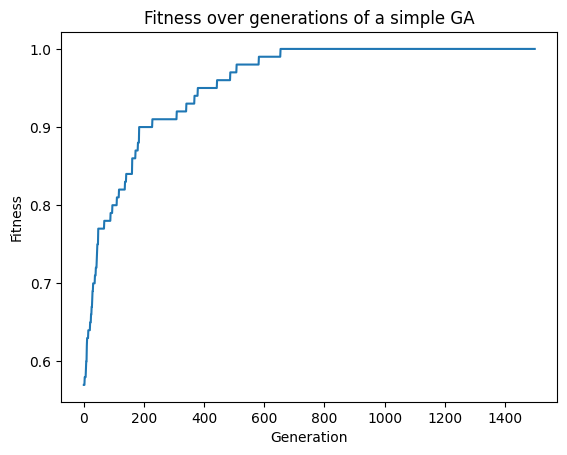

In [ ]:
plt.plot(fitness)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness over generations of a simple GA")
plt.show()

In [ ]:
def update_parent_incorrect(bitseq, mutated_bitseq, goal_bitseq):
  return mutated_bitseq

def simple_genetic_algorithm_incorrect(bitseq, goal_bitseq, generations, mu, rng):
  """
  Executes a simple genetic algorithm to evolve towards a target binary sequence.
  Uses incorrect parent update (updates without improvement check).

  Parameters:
  bitseq (numpy.ndarray): Initial binary sequence.
  goal_bitseq (numpy.ndarray): Target binary sequence.
  generations (int): Maximum number of generations.
  mu (float): Mutation rate.
  rng (numpy.random.Generator): Random number generator.

  Returns:
  list: Fitness values across generations.
  """
  n = 0
  generation_fitness = []
  while (fitness_bitseq(bitseq, goal_bitseq) < 1) and (n < generations):
    mutated_bitseq = mutate_bitseq(bitseq, mu, rng)
    bitseq = update_parent_incorrect(bitseq, mutated_bitseq, goal_bitseq)
    generation_fitness.append(fitness_bitseq(bitseq, goal_bitseq))
    n += 1
  while n < generations:
    generation_fitness.append(1.0)
    n += 1
  return generation_fitness

length = 100
mu = 1/length
generations = 1500
bitseq = generate_bitseq(length, rng)
goal_bitseq = generate_bitseq(length, rng)

fitness = simple_genetic_algorithm_incorrect(bitseq, goal_bitseq, generations, mu, rng)

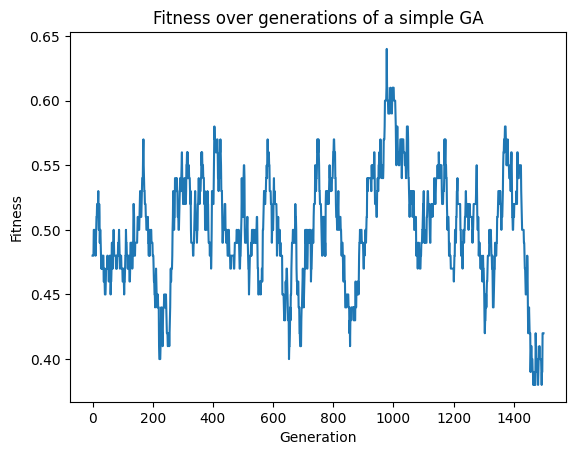

In [ ]:
plt.plot(fitness)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness over generations of a simple GA")
plt.show()

2. Now the algorithm doesn't work anymore and it more or less is just taking a random walk.

3. You cannot immediatly conclude anything due to its stochastic nature. We should therefore run both algorithms multiple times to see if the results were based on chance or not.

In [ ]:
fitnesses_algo1 = []
fitnesses_algo2 = []

for _ in range(100):
  length = 100
  mu = 1/length
  generations = 1500
  bitseq = generate_bitseq(length, rng)
  goal_bitseq = generate_bitseq(length, rng)
  fitnesses_algo1.append(simple_genetic_algorithm(bitseq, goal_bitseq, generations, mu, rng))
  fitnesses_algo2.append(simple_genetic_algorithm_incorrect(bitseq, goal_bitseq, generations, mu, rng))

average_fit_algo1 = np.mean(fitnesses_algo1, axis=0)
average_fit_algo2 = np.mean(fitnesses_algo2, axis=0)

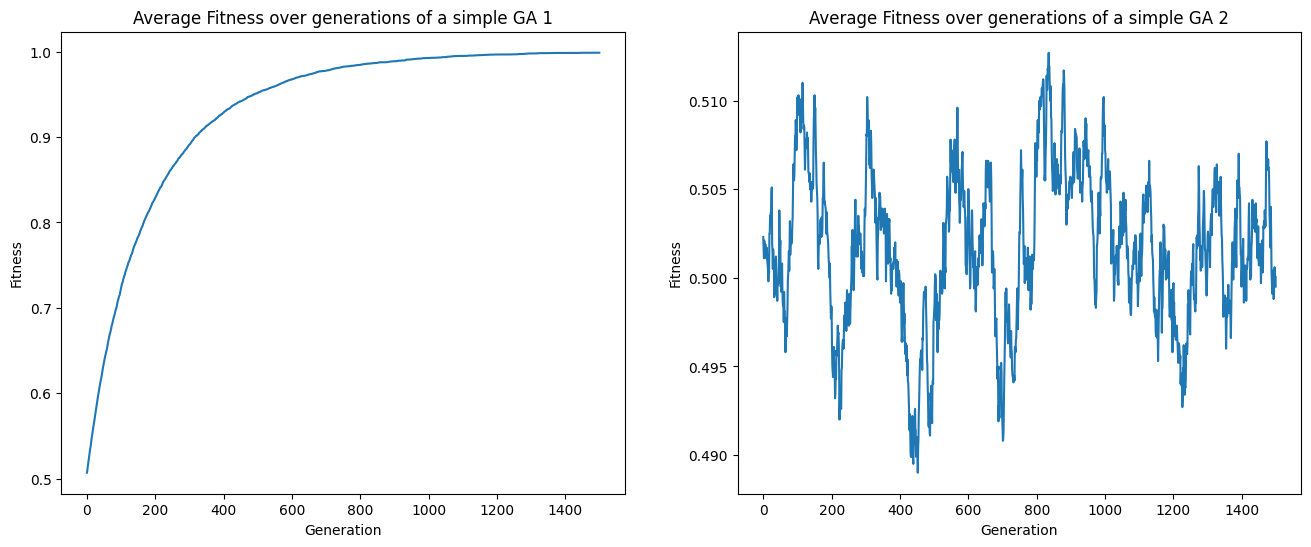

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(average_fit_algo1)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Average Fitness over generations of a simple GA 1")

plt.subplot(1, 2, 2)
plt.plot(average_fit_algo2)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Average Fitness over generations of a simple GA 2")

plt.show()

### Exercise 5.3

In [13]:
def generate_candidate(alphabet, length):
  """
  Generates a candidate solution by randomly selecting characters from the alphabet.

  Parameters:
  alphabet (str): The set of characters to choose from.
  length (int): The length of the candidate solution.
  rng (numpy.random.Generator): Random number generator.

  Returns:
  str: The generated candidate solution.
  """
  x = rng.integers(low=0, high=len(alphabet), size=length)
  candidate = [alphabet[i] for i in x]
  candidate = ''.join(candidate)
  return candidate

def fitness_function(population, solution):
  """
    Computes the fitness of each candidate solution in the population.

    Parameters:
    population (list of str): The list of candidate solutions.
    solution (str): The target solution.

    Returns:
    list of float: The fitness values for each candidate solution.
  """
  population_fitness = []
  for sequence in population:
    population_fitness.append(len(np.where(np.array(list(sequence)) == np.array(list(solution)))[0]) / len(solution))
  return population_fitness

def calculate_probabilities(population_fitness):
    """
    Calculates selection probabilities for candidate solutions.

    Parameters:
    population_fitness (list of float): The fitness values for each candidate solution.

    Returns:
    list of float: The selection probabilities for each candidate solution.
    """
    total_fitness = np.sum(population_fitness)
    if total_fitness == 0:
        return [1 / len(population_fitness)] * len(population_fitness)
    else:
        return [fitness / total_fitness for fitness in population_fitness]


def generate_new_gen(population, selection_probabilitiy, solution, crossover_probabilty, mutation_rate, gen_size, k=2):
  """
    Generates a new generation of candidate solutions using crossover and mutation operations.

    Parameters:
    population (list of str): The current population of candidate solutions.
    selection_probabilitiy (list of float): Selection probabilities for candidate solutions.
    solution (str): The target solution.
    crossover_probabilty (float): Probability of crossover operation.
    mutation_rate (float): Probability of mutation per character.
    gen_size (int): Size of the new generation.
    k (int, optional): Tournament size for selection. Defaults to 2.
    rng (numpy.random.Generator): Random number generator.

    Returns:
    list of str: The new generation of candidate solutions.
  """
  # Crossover
  new_gen = []
  for i in range(gen_size//2):
    # select the parents
    parent1 = tournament_selection(population, solution, k)
    parent2 = tournament_selection(population, solution, k)

    if np.random.random() < crossover_probabilty:
      # choose crossover point
      crossover_point = rng.integers(low=1, high=len(parent1)-1) # 1 and -1 to ensure crossover

      # recombine
      parent1 = parent1[:crossover_point] + parent2[crossover_point:]
      parent2 = parent2[:crossover_point] + parent1[crossover_point:]

    new_gen.append(parent1)
    new_gen.append(parent2)

  # Mutate
  for i, sequence in enumerate(new_gen):
    sequence_list = list(sequence)
    for j, char in enumerate(sequence_list):
      if np.random.random() < mutation_rate:
        new_char = np.random.choice(list(alphabet))
        sequence_list[j] = new_char
    mutated_sequence = ''.join(sequence_list)
    new_gen[i] = mutated_sequence

  return new_gen

def tournament_selection(population, solution, k):
  """
    Selects a candidate solution as a parent using tournament selection.

    Parameters:
    population (list of str): The current population of candidate solutions.
    solution (str): The target solution.
    k (int): Tournament size.
    rng (numpy.random.Generator): Random number generator.

    Returns:
    str: The selected parent candidate solution.
    """
  parents = np.random.choice(population, size=k)
  parents_fitness = fitness_function(parents, solution)
  return parents[np.argmax(parents_fitness)]

def fitness_prop_selection(population, selection_probability):
  """
    Selects a candidate solution as a parent using fitness proportionate selection.

    Parameters:
    population (list of str): The current population of candidate solutions.
    selection_probability (list of float): Selection probabilities for candidate solutions.
    rng (numpy.random.Generator): Random number generator.

    Returns:
    str: The selected parent candidate solution.
  """
  return np.random.choice(population, p=selection_probability)

In [14]:
def tournament_genetic_algorithm(alphabet, target_string, mutation_rate, N, crossover_probabilty=1):
  """
    Executes a tournament-based genetic algorithm to find the target string.

    Parameters:
    alphabet (str): The set of characters to choose from.
    target_string (str): The target string to be found.
    mutation_rate (float): Probability of mutation per character.
    N (int): Population size.
    crossover_probabilty (float, optional): Probability of crossover operation. Defaults to 1.
    rng (numpy.random.Generator): Random number generator.

    Returns:
    tuple: A tuple containing the best candidate solution and the number of generations taken to find it.
  """
  candidate_population = []
  for i in range(N):
    candidate_population.append(generate_candidate(alphabet, len(target_string)))
  population_fitness = fitness_function(candidate_population, target_string)

  g = 0
  while (population_fitness[np.argmax(population_fitness)] < 1):
    candidate_population = generate_new_gen(candidate_population, _, target_string, 1, mutation_rate, N)
    population_fitness = fitness_function(candidate_population, target_string)
    g += 1

  return candidate_population[np.argmax(population_fitness)], g

### Exercise 5.3.1

In [ ]:
alphabet = string.ascii_letters

target_string = 'SweetCaroline'
mutation_rate = 1/len(target_string) #Can be changed
N = 200

generations = []
for i in range(10):
  solution_string, generation = tournament_genetic_algorithm(alphabet, target_string, mutation_rate, N)
  generations.append(generation)

print(generations, np.mean(generations))

[111, 69, 121, 93, 65, 93, 86, 58, 90, 60] 84.6


### Exercise 5.3.2

In [16]:
def tournament_genetic_algorithm_2(alphabet, target_string, mutation_rate, N, G_max=100, crossover_probabilty=1):
  """
    Executes a tournament-based genetic algorithm with a maximum number of generations to find the target string.

    Parameters:
    alphabet (str): The set of characters to choose from.
    target_string (str): The target string to be found.
    mutation_rate (float): Probability of mutation per character.
    N (int): Population size.
    G_max (int, optional): Maximum number of generations. Defaults to 100.
    crossover_probabilty (float, optional): Probability of crossover operation. Defaults to 1.
    rng (numpy.random.Generator): Random number generator.

    Returns:
    tuple: A tuple containing the best candidate solution and the number of generations taken to find it.
    """
  candidate_population = []
  for i in range(N):
    candidate_population.append(generate_candidate(alphabet, len(target_string)))
  population_fitness = fitness_function(candidate_population, target_string)

  g = 0
  while (population_fitness[np.argmax(population_fitness)] < 1) and (g < G_max):
    candidate_population = generate_new_gen(candidate_population, _, target_string, 1, mutation_rate, N)
    population_fitness = fitness_function(candidate_population, target_string)
    g += 1

  return candidate_population[np.argmax(population_fitness)], g

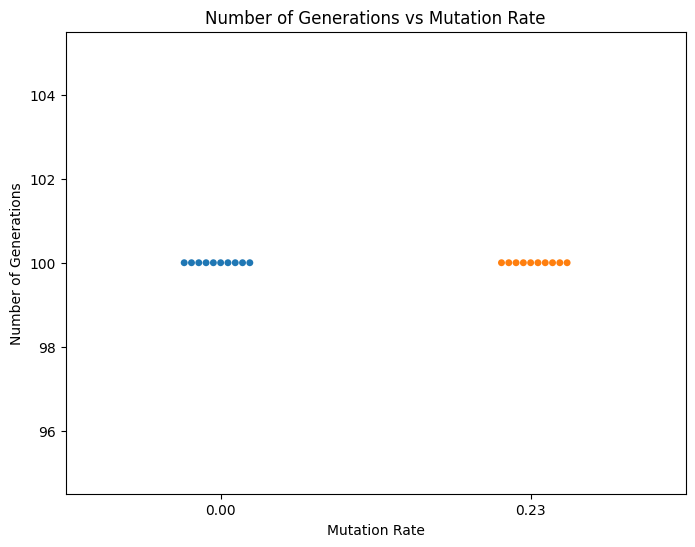

In [ ]:
mutation_rates = [0, 3/len(target_string)]

gen_mu = []
for mutation_rate in mutation_rates:
  generations = []
  for i in range(10):
    solution_string, generation = tournament_genetic_algorithm_2(alphabet, target_string, mutation_rate, N)
    generations.append(generation)
  gen_mu.append(generations)

plt.figure(figsize=(8, 6))
sns.swarmplot(data=gen_mu)
plt.xlabel('Mutation Rate')
plt.ylabel('Number of Generations')
plt.title('Number of Generations vs Mutation Rate')
plt.xticks(range(len(mutation_rates)), [f'{rate:.2f}' for rate in mutation_rates])
plt.show()

### Exercise 5.3.3 and 5.3.4

In [5]:
def hamming_distance(population):
  """
    Computes the mean pairwise Hamming distance of the sequences in the population.

    Parameters:
    population (list of str): The population of sequences.

    Returns:
    float: The mean pairwise Hamming distance.
    """
  if len(population) > 200:
    sampled_population = np.random.choice(population, size=200, replace=False)
  else:
    sampled_population = population

  distances = []
  for i, seq1 in enumerate(sampled_population):
    for j, seq2 in enumerate(sampled_population):
      if (i < j) and len(seq1) == len(seq2): # Order of pairs does not matter
        dist = 0
        for k in range(len(seq1)):
          if seq1[k] != seq2[k]:
            dist += 1
        distances.append(dist)
  mean_distance = np.mean(distances)
  return mean_distance

def calculate_shannon_entropy(population, alphabet):
  """
    Calculates the Shannon entropy for each position in the sequences of the population.

    Parameters:
    population (list of str): The population of sequences.
    alphabet (str): The set of characters in the sequences.

    Returns:
    dict: A dictionary containing the Shannon entropy for each position.
    """
  shannon_entropy = {}
  for i in range(len(population[0])):
    shannon_entropy[i] = 0

  for i in range(len(population[0])):
    for j in alphabet:
      char_count = np.sum([1 for seq in population if seq[i] == j])
      if char_count != 0:
        shannon_entropy[i] += char_count * np.log2(char_count)
  for i in range(len(population[0])):
    shannon_entropy[i] = -shannon_entropy[i] / len(population)

  return shannon_entropy

def plot_sequence_logo(candidate_population, alphabet):
  """
    Plots a sequence logo based on the candidate population and alphabet.

    Parameters:
    candidate_population (list of str): The candidate population of sequences.
    alphabet (str): The set of characters in the sequences.
    """
  logo_df = logomaker.alignment_to_matrix(candidate_population)
  shannon_entropy = calculate_shannon_entropy(candidate_population, alphabet)

  fig, ax = plt.subplots(figsize=[8, 4])
  logo = logomaker.Logo(logo_df, ax=ax)
  logo.style_spines(visible=False)
  plt.show()

In [6]:
def tournament_genetic_algorithm_3(alphabet, target_string, mutation_rate, N, G_max=100, crossover_probabilty=1):
  """
    Executes a tournament-based genetic algorithm with a maximum number of generations to find the target string,
    printing Hamming distance and best candidate sequence every 10 generations, and plotting a sequence logo at the end.

    Parameters:
    alphabet (str): The set of characters to choose from.
    target_string (str): The target string to be found.
    mutation_rate (float): Probability of mutation per character.
    N (int): Population size.
    G_max (int, optional): Maximum number of generations. Defaults to 100.
    crossover_probabilty (float, optional): Probability of crossover operation. Defaults to 1.

    Returns:
    tuple: A tuple containing the best candidate solution and the number of generations taken to find it.
  """
  candidate_population = []
  for i in range(N):
    candidate_population.append(generate_candidate(alphabet, len(target_string)))
  population_fitness = fitness_function(candidate_population, target_string)

  g = 0
  while (population_fitness[np.argmax(population_fitness)] < 1) and (g < G_max):
    candidate_population = generate_new_gen(candidate_population, _, target_string, 1, mutation_rate, N)
    population_fitness = fitness_function(candidate_population, target_string)

    if g % 10 == 0:
      print(hamming_distance(candidate_population))
      print(candidate_population[np.argmax(population_fitness)])
    g += 1

  plot_sequence_logo(candidate_population, alphabet)
  print(candidate_population[np.argmax(population_fitness)])
  print(20*"-")
  return candidate_population[np.argmax(population_fitness)], g

Run 0 with mutation rate: 0
12.636331658291457
dgEBtpegolqeX
7.663015075376885
SwReHUvUolrnT
4.246030150753769
SwRetUarolVnT
0.9345226130653266
SweetUarolrnT
0.9704020100502513
SweetparolrnT
0.9718090452261307
SweetUarolrnT
0.6824120603015076
SweetparolrnT
0.616532663316583
SweetUarolrnT
0.6276884422110552
SweetUarolrnT
0.4166331658291457
SweetUarolrnT


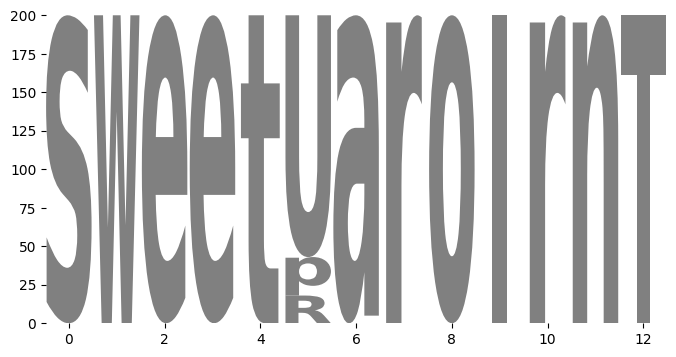

SweetparolrnT
--------------------
Run 1 with mutation rate: 0
12.635979899497487
dgPekVLVoMuYe
7.85537688442211
VweptCXroUiWc
0.7452261306532664
VweptCXroUiWc
0.883467336683417
VweptCaroUiWc
0.16457286432160803
VweptCaroUiWc
0.0
VweptCaroUiWc
0.0
VweptCaroUiWc
0.0
VweptCaroUiWc
0.0
VweptCaroUiWc
0.0
VweptCaroUiWc


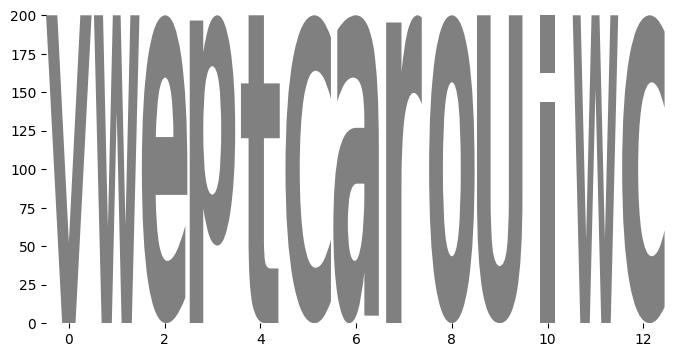

VweptCaroUiWc
--------------------
Run 2 with mutation rate: 0
12.646331658291457
KtiDtiDFohiwU
9.207336683417086
owiDtCCroLijg
4.442361809045226
SwietCqroliwU
1.968140703517588
SwietCrrolijg
1.5287437185929649
SwaetCqrolijg
1.7629145728643216
SwHetCqrolijg
1.5302010050251256
SwHetCqrolijg
1.47321608040201
SwHetCrrolijg
1.643819095477387
SwVetCrrolijg
1.3633668341708542
SwHetCrrolijg


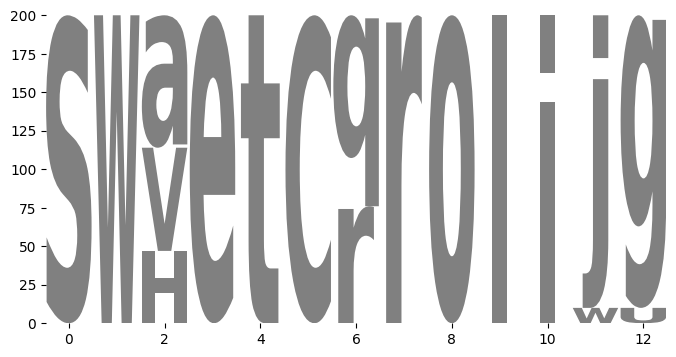

SwHetCrrolijg
--------------------
Run 3 with mutation rate: 0
12.642663316582915
NwLdslYDWPMje
7.634020100502513
SnLeECsLylEIe
3.8721608040201003
SweeECpWJlinv
1.6015577889447237
SweeECmWJlinv
1.7747738693467336
SweeECmGWliTe
1.4318592964824122
SweeECmWJlinv
1.4081909547738694
SweeECmGJlinv
1.0420100502512564
SweeECmGWlinv
0.7998994974874372
SweeECmGWlinv
0.8690954773869347
SweeECmGJlinv


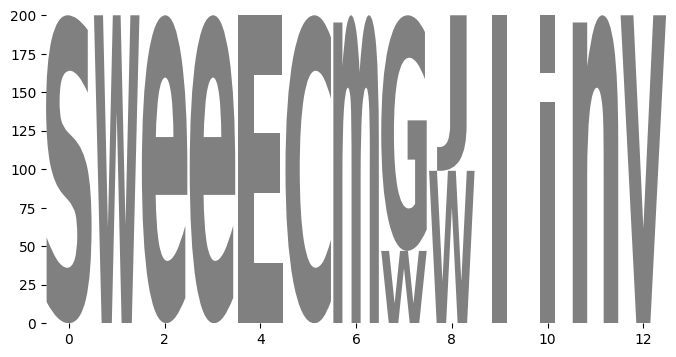

SweeECmGWlinv
--------------------
Run 4 with mutation rate: 0
12.660201005025126
CGfYvddTnyinE
7.737788944723618
SzhttCabxGinW
3.3538693467336684
SlhetCarxliZe
1.6335678391959798
SssetCarxliZe
1.166180904522613
SlhetCarxliZe
1.2685929648241205
SzhetCarxliZe
1.349145728643216
SzhetCarxliZe
1.0029145728643216
SzhetCarxliZe
0.9714070351758795
SlhetCarxliZe
0.9810552763819096
SzhetCarxliZe


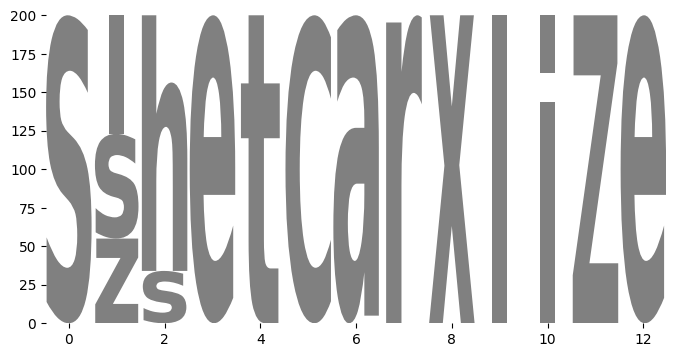

SlhetCarxliZe
--------------------
Run 5 with mutation rate: 0
12.652361809045226
pkOcSeBUASiRe
7.5492964824120605
UweTEyarqUiRe
1.7114070351758794
UweltCarqUiRe
0.7660804020100502
cweatCarqUiRe
0.8605527638190955
UweatCarqUiRe
0.9307537688442211
UweKtCarqUiRe
0.8279899497487437
UweltCarqUiRe
0.8660301507537689
UweltCarqUiRe
0.7129145728643216
UweatCarqUiRe
0.7342713567839196
UweKtCarqUiRe


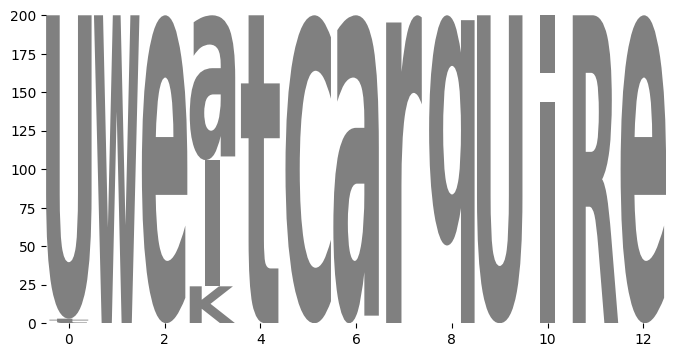

UweatCarqUiRe
--------------------
Run 6 with mutation rate: 0
12.641507537688442
XveGQCaZHwvOW
8.703115577889447
SOeftCaZHbNfe
2.0305527638190957
SIeetCaroUUnf
1.0130150753768845
SOeetCaroUUnf
1.0980402010050252
SIeetCaroUUnf
0.9192462311557789
SOeetCaroUUnf
1.0136180904522614
SOeetCaronnnf
0.45261306532663315
SOeetCaroUUnf
0.5880402010050251
SOeetCaroUUnf
0.7595477386934674
SOeetCaroUUnf


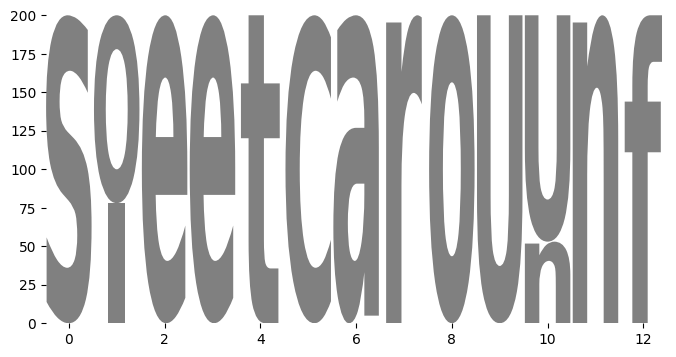

SIeetCaroUUnf
--------------------
Run 7 with mutation rate: 0
12.64251256281407
ScsyvClecakNj
9.670201005025126
oIeetTDooMinK
4.812160804020101
SweeiCaroRinK
0.6635175879396985
SweetCaroRinK
0.5782914572864322
SweetCaroRinK
0.49542713567839197
SweetCaroRinK
0.47819095477386936
SweetCaroRinK
0.49748743718592964
SweetCaroRinK
0.5007035175879397
SweetCaroRinK
0.3392462311557789
SweetCaroRinK


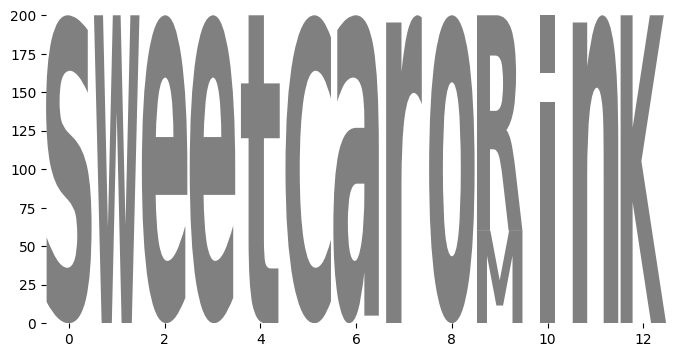

SweetCaroRinK
--------------------
Run 8 with mutation rate: 0
12.657386934673367
pGedtHoRkZNDs
6.142110552763819
KweebCPrilanQ
3.762964824120603
SweeECProlknA
1.4793467336683417
SweebCProlanA
1.0896984924623117
SweebCProlanQ
0.8520603015075376
SweebCProlanQ
0.7733668341708543
SweebCProlanQ
0.9046733668341709
SweebCProlanQ
0.8580402010050251
SweebCProlanQ
0.9492964824120603
SweebCProlNnQ


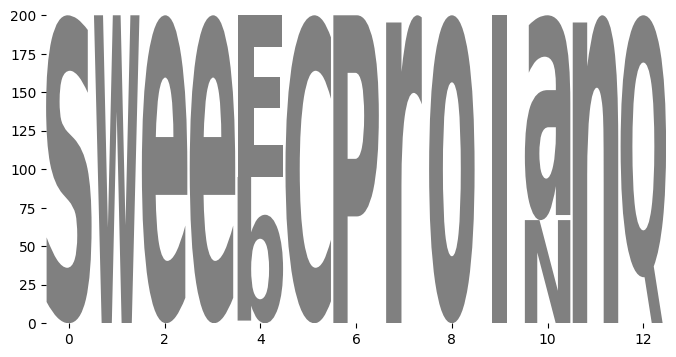

SweeECProlNnQ
--------------------
Run 9 with mutation rate: 0
12.647638190954774
fwTHURbKYkieK
9.814020100502512
SYexACVWSlCnI
5.658844221105528
SweUmCaWOTiTe
2.7782412060301507
SweUKCaqOliTe
2.7774874371859295
SweLiCaWSlinI
2.847185929648241
SweLVCaBSliTe
2.927185929648241
SweUiCaBSliTe
2.84356783919598
SweLiCaESlinI
3.022613065326633
SweUVCaqSlinI
2.6636683417085427
SweLVCaBSliTe


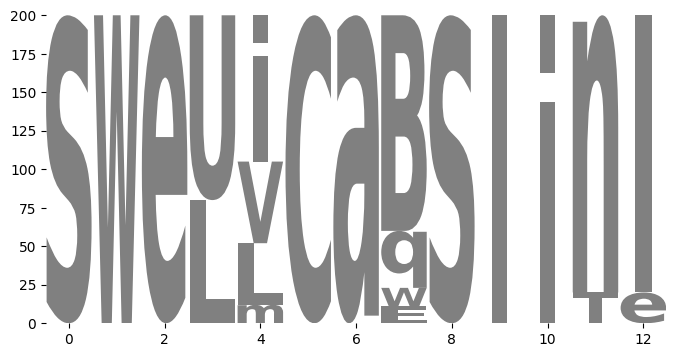

SweUiCaqSlinI
--------------------
Run 0 with mutation rate: 0.07692307692307693
12.65251256281407
mCCuWfarrXnBe
11.080954773869347
SweeyOaroavvD
8.788291457286432
SweeyjaroxiDl
7.705979899497487
SweevEaroCinT
7.048693467336683
SweezmaroCinT
6.804221105527638
SweenLaronind
7.484120603015075
Sweetparojihe
7.638844221105527
SweetCarQIibe
6.7756281407035175
SweetParoliKu
7.3208040201005025
SweMtWarolihe


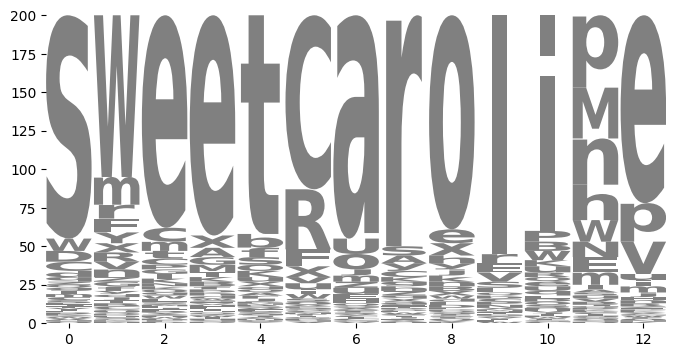

SmeetCaroline
--------------------
Run 1 with mutation rate: 0.07692307692307693
12.659748743718593
SjeNiATGcycUW
11.008693467336684
SwwepItcoVmHe
9.685929648241206
SwneSBahodiRe
8.07854271356784
SwTerCaaoliDe
7.531356783919598
SwqetNaKoliie
7.18070351758794
SweetCayoliLe
7.130050251256281
SweetCardliJe
6.277939698492462
SweetCadoline
6.479849246231156
SweGtCaroline
6.636984924623116
SweetCaroIine


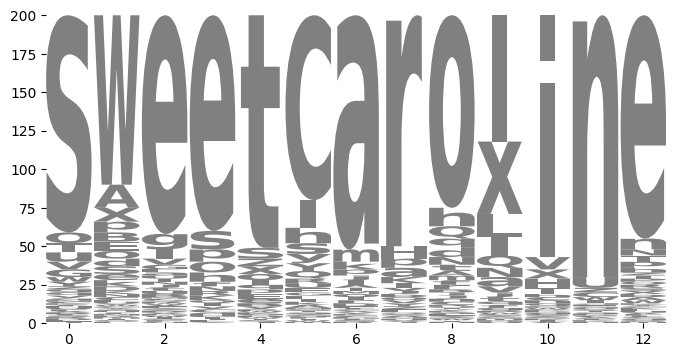

SweetCaroline
--------------------
Run 2 with mutation rate: 0.07692307692307693
12.66678391959799
SeLPilWrCUEye
11.162763819095478
SwLFtCuMofiCy
9.34356783919598
SwaStCaHohime
8.966130653266331
SweetCazoJiue
7.7621105527638194
SweetCagoDine
7.0345226130653264
SweetCaroliZe


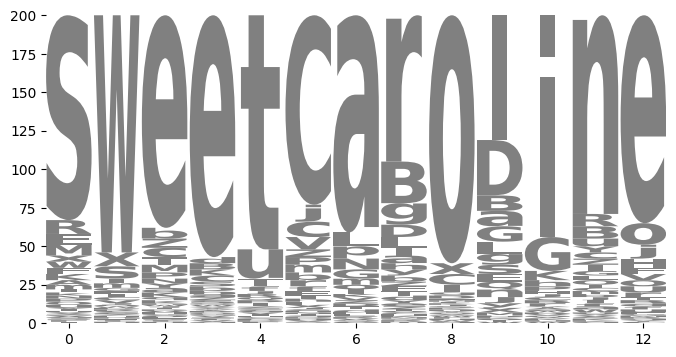

SweetCaroline
--------------------
Run 3 with mutation rate: 0.07692307692307693
12.654472361809045
SRiYWpfTjBgno
11.155427135678393
hwebTtaTDlDLe
9.446180904522613
GBeeLjarolxne
8.405276381909548
SwVeNCarolGne
7.358341708542714
SweewCarolvne
6.508894472361809
SweebCaholine
6.337537688442211
SweekCaroline
6.632613065326633
Sweecuaroline
6.614623115577889
SweeMCaroline
6.36964824120603
SweevCaroline


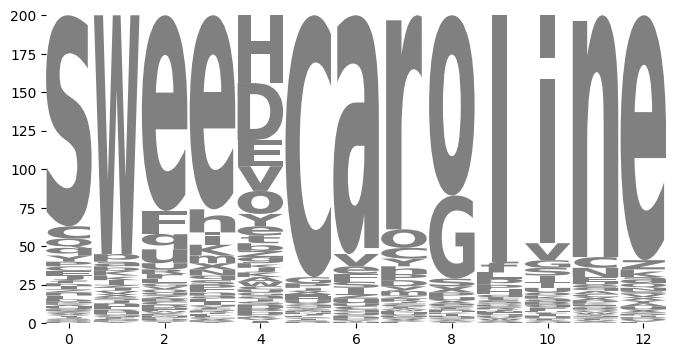

SweeoCaroline
--------------------
Run 4 with mutation rate: 0.07692307692307693
12.672311557788944
nknOtcPQULMne
10.292412060301508
SwoeRSaJosene
7.857185929648241
SweetSaUosIne
7.532562814070352
SweetCaqoTine
6.674070351758794
SweetCaKoTine
7.562663316582914
SweetCapoqine
6.805175879396985
SweetCdroqine
6.630804020100502
SweetCaroginF
6.845678391959799
SweetCaioline
7.103115577889447
SwAetCaroiine


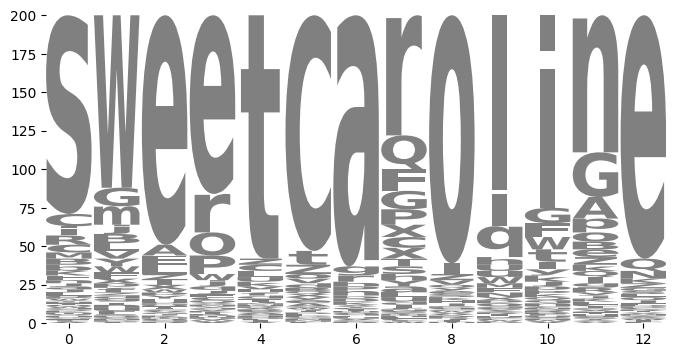

SweetCaroline
--------------------
Run 5 with mutation rate: 0.07692307692307693
12.664723618090452
JXeQznfynxiqM
11.094623115577889
qweRuCpXfliQj
9.503115577889448
SwpotCavolyWe
8.42321608040201
SweetCaHolDee
7.390402010050251
SweetCaIolBne
6.705427135678392
SweetCaxolixe
6.967788944723618
SweetCauoline
7.038341708542713
SfeetCaZoline
6.821758793969849
SLeetCaToline
6.811708542713568
SweetCaLoVine


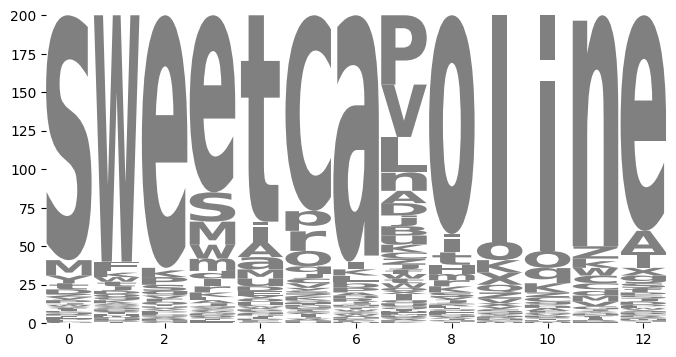

SweetCaPoline
--------------------
Run 6 with mutation rate: 0.07692307692307693
12.66929648241206
CAsYtCQCowAGa
10.967537688442212
XwaftUaColdnt
9.00854271356784
SwjeaCaIoliVA
8.12070351758794
QwyetCawolzne
7.124522613065326
SweetCaIolnne
6.368643216080402
SwhetCaColine
6.491859296482412
OweetCajoline
6.456281407035176
SweetCaroline


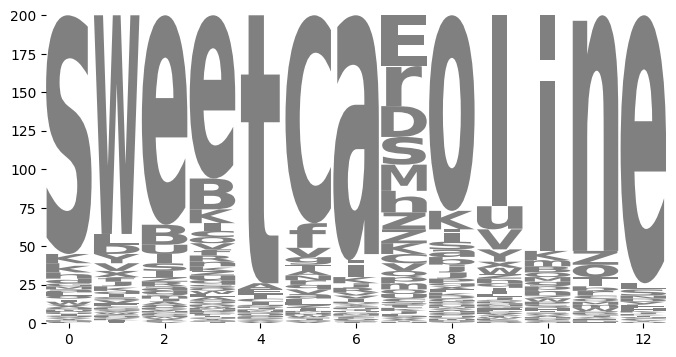

SweetCaroline
--------------------
Run 7 with mutation rate: 0.07692307692307693
12.660904522613066
HVeJjDKMaUBnE
11.299798994974875
iweLKCpVdXinE
9.53929648241206
SwectfoTHline
8.279396984924624
SwectCjgoline
7.053668341708542
SweQtCaBoline
6.270150753768844
SweetCaloline
7.292613065326633
SwHetCaNoline
6.541105527638191
SweetCacoline
6.550502512562814
SweetCaWoline
6.686030150753769
SweetCaYolAne


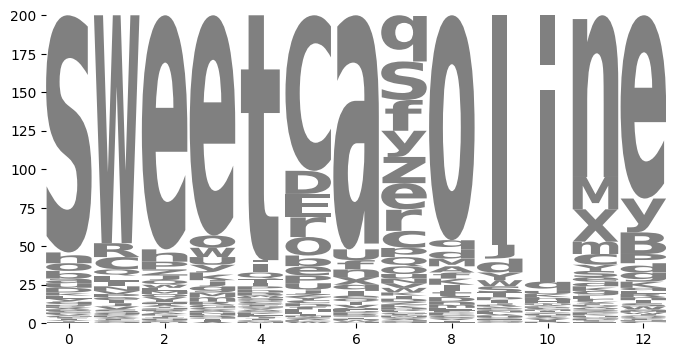

SweetCaSoline
--------------------
Run 8 with mutation rate: 0.07692307692307693
12.634824120603016
STldyCWgVyuhz
11.154723618090452
SIekgCaAoGlbe
9.422964824120603
SJedlCarolinV
7.965929648241206
SweeMCarIlinV
7.540251256281407
SweetJarTline
7.229497487437186
SweeLCaroline


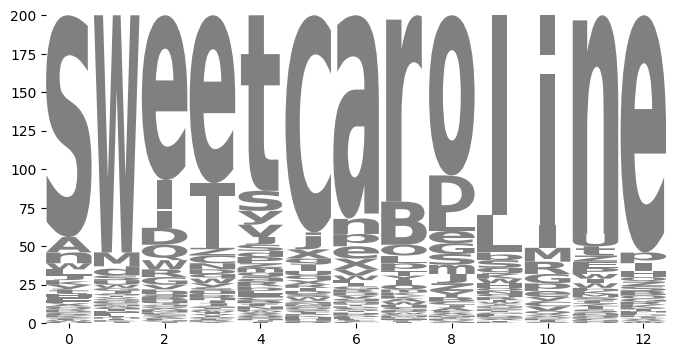

SweetCaroline
--------------------
Run 9 with mutation rate: 0.07692307692307693
12.645929648241205
MwfehbtyKGraH
10.610653266331658
SoAWtQZrolicy
9.204522613065327
sweeeClroGiqe
8.308391959798994
SweetCjrolicb
7.625829145728643
SweetCarEliFe
6.900502512562814
SweetCarolrne
6.10286432160804
SweetCarolinr
6.154321608040201
SweetCarolinU


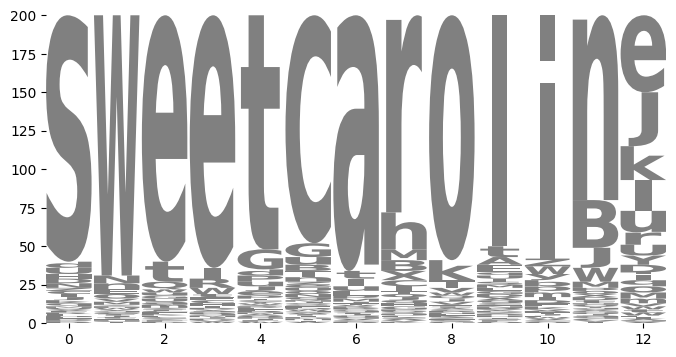

SweetCaroline
--------------------
Run 0 with mutation rate: 0.23076923076923078
12.67678391959799
SlnsuAGQciong
12.340452261306533
ShkztWxroQGep
12.249447236180904
SEeQoCsrKEuCe
12.10824120603015
ywuAtCVrnEzVe
12.055929648241205
SxecQCarxhGhe
12.179346733668341
RtBetCaXqLfre
12.013417085427136
HwvrtLaYWAine
12.067236180904523
zAeetCYHbainZ
12.182663316582914
TwhenCloWBina
12.26251256281407
SveYtCfJWlNlg


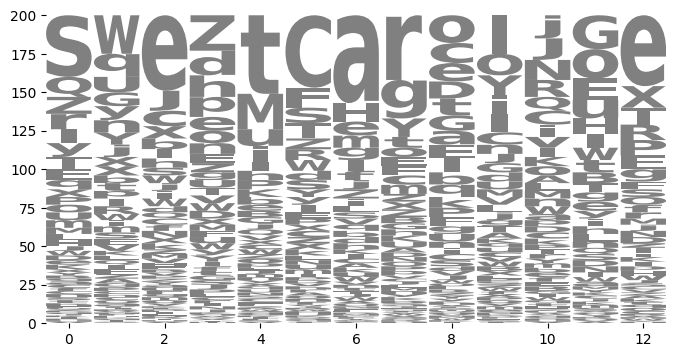

ZzeoMYaqoljEe
--------------------
Run 1 with mutation rate: 0.23076923076923078
12.686633165829146
fxHiYrBAoGrnN
12.42537688442211
yIeegRcWoBiwE
12.283165829145728
eweDeCYXonOnf
12.26251256281407
ZweeDxZELlGnb
12.07929648241206
uwEeOLwTolQnO
12.188743718592965
SaUctBNqolnnt
12.245979899497488
SWeOcCRtooHre
12.029547738693468
oXvernarzlGte
11.921608040201004
WQehuearaliIZ
12.225527638190954
ewrHqCaAoMFae


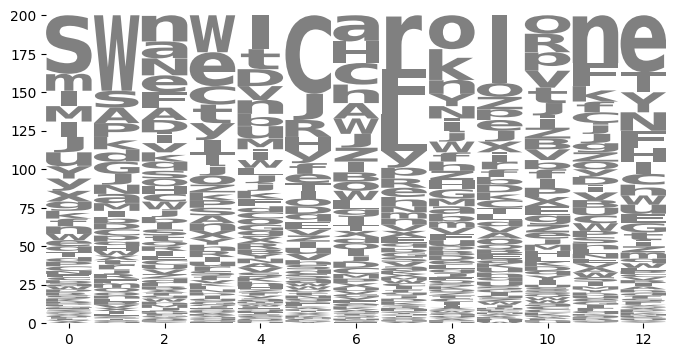

SCetuJaFhVKne
--------------------
Run 2 with mutation rate: 0.23076923076923078
12.671909547738693
hHFakyUrOilnJ
12.413467336683418
wKeetCrmBzWNe
12.336381909547738
jheuBfxrPlUne
12.26
NwWeRCjMulDCe
12.099547738693467
SjNeyAsgolFnF
12.205527638190954
SwqetQTFalBye
12.100251256281407
SweetCPbRvowe
12.290100502512562
SseftiaYSKtnQ
12.24678391959799
SwcaCpQFolLhV
12.274422110552765
vwnPtCEroUZoM


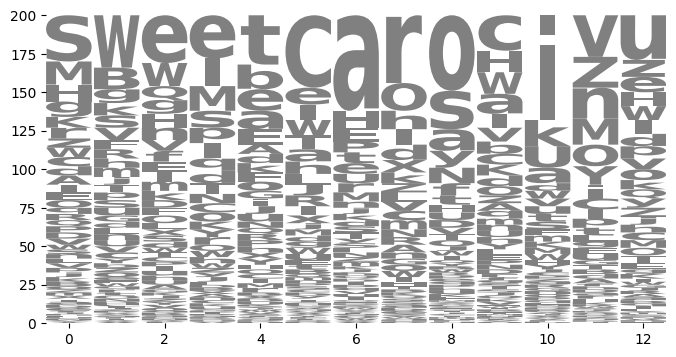

STeMbBarmyidm
--------------------
Run 3 with mutation rate: 0.23076923076923078
12.690251256281407
CXekhCuTmgKnx
12.388442211055276
SMeirUarmsbjx
12.199396984924624
SxYDtkawFlsre
12.106934673366835
JweAtLHroHiyc
12.002261306532663
SweUtGQroRRKF
12.069748743718593
twuHPCmsoliFD
12.250904522613066
SReBFkQrrlpPe
12.173819095477388
SsQetYabolpHA
12.13321608040201
SwgtfCaExlEde
12.085628140703518
RwNCkCaSopiOz


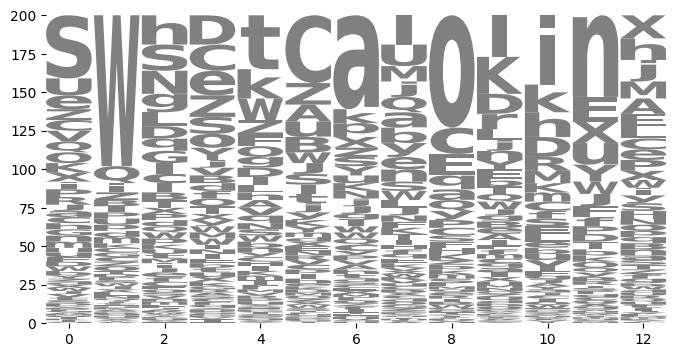

SwIDtlaWohknh
--------------------
Run 4 with mutation rate: 0.23076923076923078
12.692713567839196
pweDtHMMTINxB
12.318542713567838
DJFatOArHliiZ
12.133768844221105
sweTJxMralHnN
12.098643216080402
SwKRtCYpobiet
11.997989949748744
EKewpaorouinV
12.199346733668342
SReecKqroTxnb
12.110653266331658
SIgetZwaopigW
12.177085427135678
ShtetFanxwivL
12.134773869346734
SRYeJnarglqnI
12.253919597989949
FAeitGAYolDnp


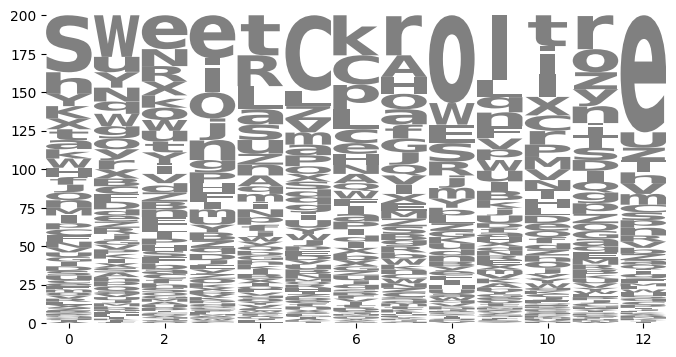

IdeBtCLWoltze
--------------------
Run 5 with mutation rate: 0.23076923076923078
12.661608040201004
XqRemCzFpoBxz
12.283015075376884
StsztGxrolntZ
12.215175879396986
ShMIliarclele
12.11251256281407
SwkPxWarWlvnM
12.175075376884422
SwEOtcaKoZHCw
12.162914572864322
SGeItesrXdiHU
12.08467336683417
SwiOtCGrPtVJt
12.043266331658291
SwghtCtUoriox
11.945326633165829
xwnaXCaWopinZ
12.143668341708542
VwretGarPDUnF


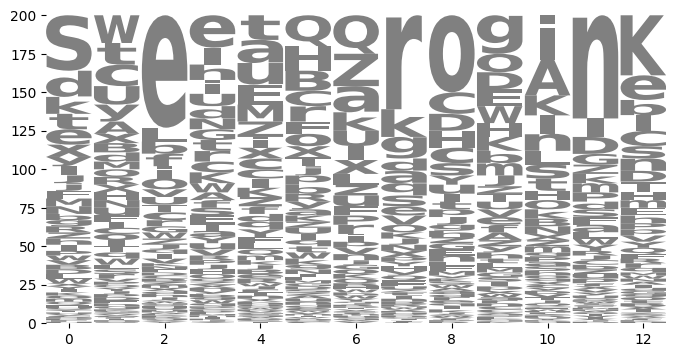

ScUeuTaZohiFn
--------------------
Run 6 with mutation rate: 0.23076923076923078
12.685276381909548
NOXfXwYholCHd
12.331407035175879
SmUeMruOonRie
12.159095477386934
SFrvXCQpoKfne
12.13
STOVGCaKoRrde
12.208442211055276
SxnocCGrLlWET
12.265577889447236
SiKutCaJKlITM
12.092261306532663
LwjXtCaeoAoap
12.248793969849245
SBIKtCzPDSMnk
12.107738693467336
ShFmpCkzKliZe
12.22281407035176
SpeyLCWrLxihe


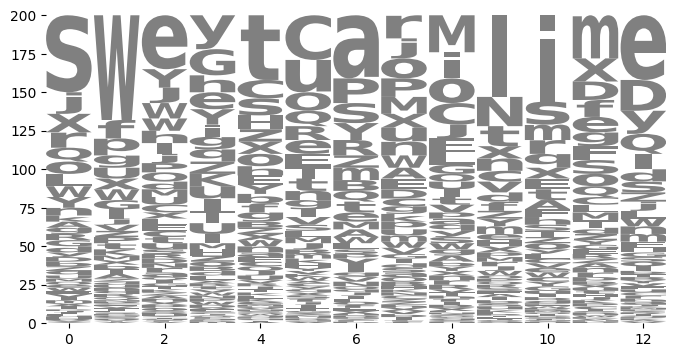

jweTttBMhlife
--------------------
Run 7 with mutation rate: 0.23076923076923078
12.672613065326633
LWqeGpioYFiFy
12.414020100502512
tSeeoCzrCkOsl
12.231507537688442
kWkotRarBcPne
11.990301507537689
SDuYtNarLqjnH
12.15497487437186
twWJWUkrMnine
12.173768844221106
skeeuNareBinT
11.979045226130653
SweeIxaQxKOfM
12.193819095477387
aTePJParEwWne
12.256633165829145
SwvmtKarNRPMZ
12.0121608040201
RsfejHardmiDY


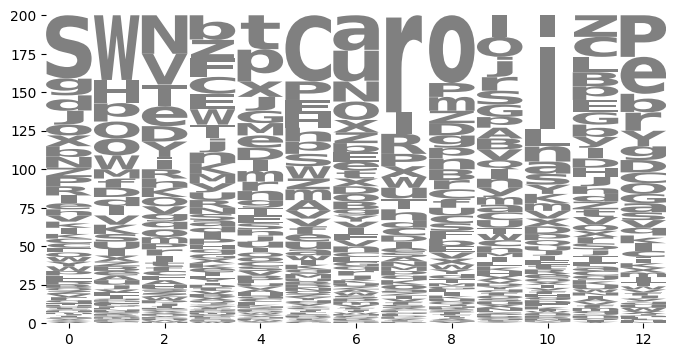

SwNWpWOroQizX
--------------------
Run 8 with mutation rate: 0.23076923076923078
12.686633165829146
SFeiuiyUAiynR
12.33532663316583
SwUlicarbWENC
12.2564824120603
SwjetHNSRDDnr
12.186683417085428
BhmItzanolivX
12.077788944723618
FDeBtEEDoltnT
12.136231155778894
SFeeMCarlveSG
12.309949748743719
MCCAtCaRvcinn
12.258994974874373
SwewijaqoKikq
12.173467336683418
SwSdnCakQeiWe
12.123165829145728
SwDiNCyrogEnb


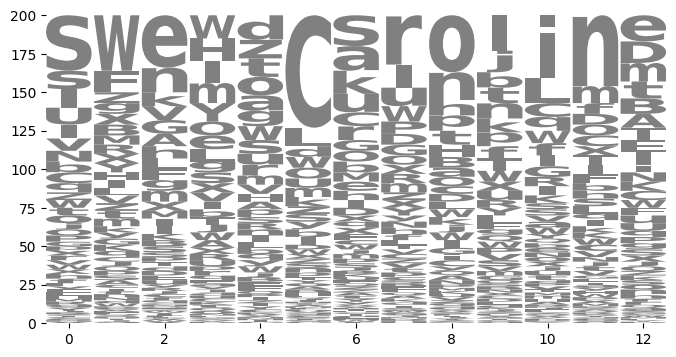

SwwmtCxWtliaD
--------------------
Run 9 with mutation rate: 0.23076923076923078
12.698643216080402
EosFVymEolCKX
12.344824120603015
hOeeuCnlTvhne
12.29321608040201
SwPLDCalzlegU
12.228743718592964
tlMetqpcoliPH
12.350954773869347
GwejtwNprlikK
12.298894472361809
ugeeeCaRsnwOZ
12.233115577889448
XaeItNaCclici
12.085226130653266
AweNtRbealiDv
12.080954773869347
SweGIDaZoSiGW
12.067889447236182
UweeAAaBojENe


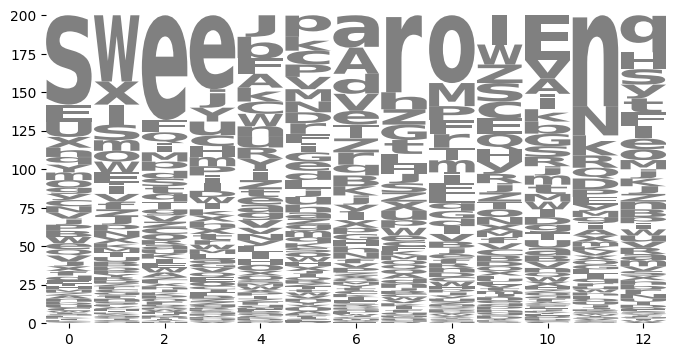

SweeJuZropAnq
--------------------


In [8]:
alphabet = string.ascii_letters

target_string = 'SweetCaroline'
N = 200

mutation_rates = [0, 1/len(target_string), 3/len(target_string)]

gen_mu = []
for mutation_rate in mutation_rates:
  generations = []
  for i in range(10):
    print("Run", i, "with mutation rate:", mutation_rate)
    solution_string, generation = tournament_genetic_algorithm_3(alphabet, target_string, mutation_rate, N)
    generations.append(generation)
  gen_mu.append(generations)

### Exercise 5.3.5

The sweet spot seems for $\mu$ to be $\frac{1}{L}$. With no mutation we get to little diversity, while $\mu=\frac{3}{L}$ leads to too much diversity, which can be seen in the sequence logos.

### Exercise 5.3.6

In [11]:
def tournament_genetic_algorithm_4(alphabet, target_string, mutation_rate, N, G_max=100, crossover_probabilty=1):
  """
    Executes a tournament-based genetic algorithm with a maximum number of generations to find the target string.

    Parameters:
    alphabet (str): The set of characters to choose from.
    target_string (str): The target string to be found.
    mutation_rate (float): Probability of mutation per character.
    N (int): Population size.
    G_max (int, optional): Maximum number of generations. Defaults to 100.
    crossover_probabilty (float, optional): Probability of crossover operation. Defaults to 1.

    Returns:
    tuple: A tuple containing the best candidate solution and the number of generations taken to find it.
  """
  candidate_population = []
  for i in range(N):
    candidate_population.append(generate_candidate(alphabet, len(target_string)))
  population_fitness = fitness_function(candidate_population, target_string)

  g = 0
  while (population_fitness[np.argmax(population_fitness)] < 1) and (g < G_max):
    candidate_population = generate_new_gen(candidate_population, _, target_string, 1, mutation_rate, N)
    population_fitness = fitness_function(candidate_population, target_string)
    g += 1

  return candidate_population[np.argmax(population_fitness)], g

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


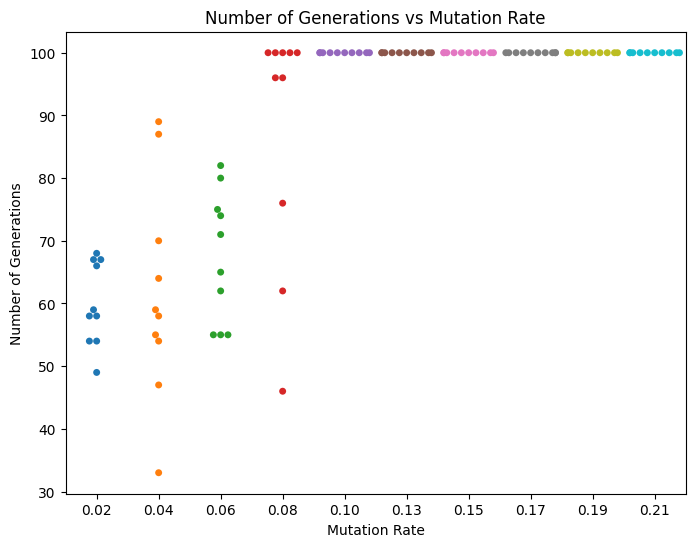

In [ ]:
alphabet = string.ascii_letters

target_string = 'SweetCaroline'
N = 200

mutation_rates = np.linspace(0, 3/len(target_string), 12)
mutation_rates = mutation_rates[1:11]

gen_mu = []
for mutation_rate in mutation_rates:
  generations = []
  for i in range(10):
    solution_string, generation = tournament_genetic_algorithm_4(alphabet, target_string, mutation_rate, N)
    generations.append(generation)
  gen_mu.append(generations)

plt.figure(figsize=(8, 6))
sns.swarmplot(data=gen_mu)
plt.xlabel('Mutation Rate')
plt.ylabel('Number of Generations')
plt.title('Number of Generations vs Mutation Rate')
plt.xticks(range(len(mutation_rates)), [f'{rate:.2f}' for rate in mutation_rates])
plt.show()

In [ ]:
mean_generations = np.mean(gen_mu, axis=1)
for i, mutation_rate in enumerate(mutation_rates):
  print("Mutation Rate: {:.2f}, Mean Generations: {:.2f}".format(mutation_rate, mean_generations[i]))

Mutation Rate: 0.02, Mean Generations: 60.00
Mutation Rate: 0.04, Mean Generations: 61.60
Mutation Rate: 0.06, Mean Generations: 67.40
Mutation Rate: 0.08, Mean Generations: 87.60
Mutation Rate: 0.10, Mean Generations: 100.00
Mutation Rate: 0.13, Mean Generations: 100.00
Mutation Rate: 0.15, Mean Generations: 100.00
Mutation Rate: 0.17, Mean Generations: 100.00
Mutation Rate: 0.19, Mean Generations: 100.00
Mutation Rate: 0.21, Mean Generations: 100.00


The overall best mutation rate seems to be $\mu = 0.02$, but we sometimes had quicker solutions with $\mu= 0.04$.

### Exercise 5.3.7

In [9]:
def tournament_genetic_algorithm_5(alphabet, target_string, mutation_rate, N, k, G_max=100, crossover_probabilty=1):
  """
    Executes a tournament-based genetic algorithm with a maximum number of generations to find the target string,
    using tournament selection with a specified tournament size.

    Parameters:
    alphabet (str): The set of characters to choose from.
    target_string (str): The target string to be found.
    mutation_rate (float): Probability of mutation per character.
    N (int): Population size.
    k (int): Tournament size for selection.
    G_max (int, optional): Maximum number of generations. Defaults to 100.
    crossover_probabilty (float, optional): Probability of crossover operation. Defaults to 1.

    Returns:
    tuple: A tuple containing the best candidate solution and the number of generations taken to find it.
  """
  candidate_population = []
  for i in range(N):
    candidate_population.append(generate_candidate(alphabet, len(target_string)))
  population_fitness = fitness_function(candidate_population, target_string)

  g = 0
  while (population_fitness[np.argmax(population_fitness)] < 1) and (g < G_max):
    candidate_population = generate_new_gen(candidate_population, _, target_string, 1, mutation_rate, N, k=k)
    population_fitness = fitness_function(candidate_population, target_string)

    g += 1
  return candidate_population[np.argmax(population_fitness)], g

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


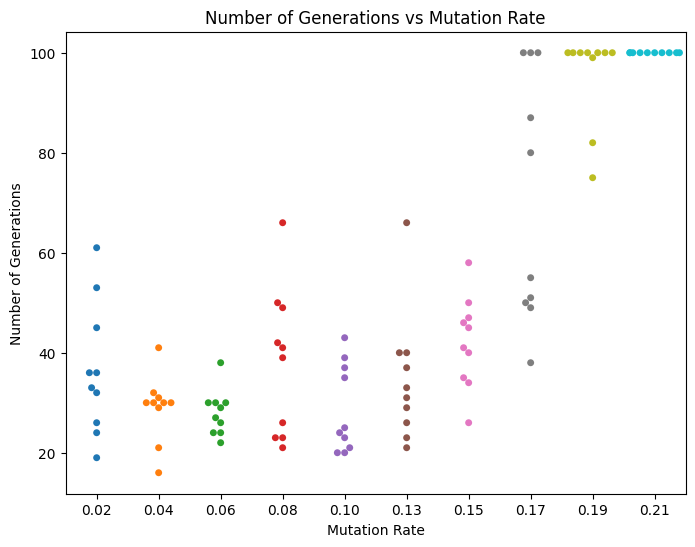

In [ ]:
alphabet = string.ascii_letters

target_string = 'SweetCaroline'
N = 200

mutation_rates = np.linspace(0, 3/len(target_string), 12)
mutation_rates = mutation_rates[1:11]

gen_mu = []
for mutation_rate in mutation_rates:
  generations = []
  for i in range(10):
    solution_string, generation = tournament_genetic_algorithm_5(alphabet, target_string, mutation_rate, N, 5)
    generations.append(generation)
  gen_mu.append(generations)

plt.figure(figsize=(8, 6))
sns.swarmplot(data=gen_mu)
plt.xlabel('Mutation Rate')
plt.ylabel('Number of Generations')
plt.title('Number of Generations vs Mutation Rate')
plt.xticks(range(len(mutation_rates)), [f'{rate:.2f}' for rate in mutation_rates])
plt.show()

In [ ]:
mean_generations = np.mean(gen_mu, axis=1)
for i, mutation_rate in enumerate(mutation_rates):
  print("Mutation Rate: {:.2f}, Mean Generations: {:.2f}".format(mutation_rate, mean_generations[i]))

Mutation Rate: 0.02, Mean Generations: 36.50
Mutation Rate: 0.04, Mean Generations: 29.00
Mutation Rate: 0.06, Mean Generations: 28.00
Mutation Rate: 0.08, Mean Generations: 38.00
Mutation Rate: 0.10, Mean Generations: 28.70
Mutation Rate: 0.13, Mean Generations: 34.60
Mutation Rate: 0.15, Mean Generations: 42.20
Mutation Rate: 0.17, Mean Generations: 71.00
Mutation Rate: 0.19, Mean Generations: 95.60
Mutation Rate: 0.21, Mean Generations: 100.00


We now find the target solution a lot quicker. Also the best mutation rate that we find now is $\mu=0.06$. Although this should probably be taken with a grain of salt given how close other mutation rates are. To get a more definitive answer we should increase the times we run the algorithm.